In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
- LIMIT_BAL: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
- SEX: Gender (1 = male; 2 = female).
- EDUCATION: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
- MARRIAGE: Marital status (1 = married; 2 = single; 3 = others).
- AGE: Age (year).
- PAY_0-PAY_6: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 0 = the repayment status in September, 2005; 2 = the repayment status in August, 2005; . . .;6 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
- BILL_AMT1-BILL_AMT6: Amount of bill statement (NT dollar). 1 = amount of bill statement in September, 2005; 2 = amount of bill statement in August, 2005; . . .; 6 = amount of bill statement in April, 2005. 
- PAY_AMT1-PAY_AMT6: Amount of previous payment (NT dollar). 1 = amount paid in September, 2005; 2 = amount paid in August, 2005; . . .;6 = amount paid in April, 2005.

In [2]:
df = pd.read_csv('Datasets/Credit.csv')

display(df)
df.shape

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


(30000, 25)

In [3]:
age = df['AGE']
age.describe()



count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

# Age distribution

In [4]:
age.describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

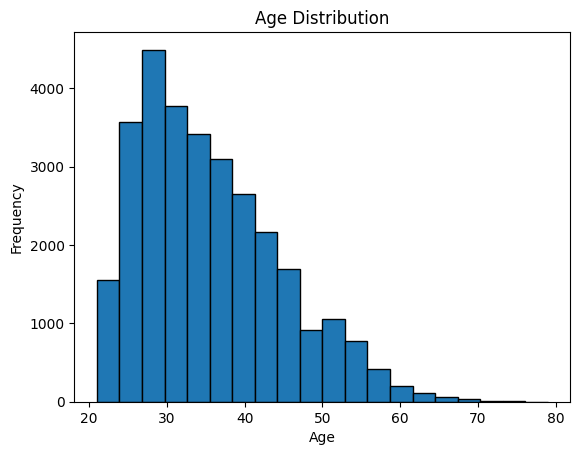

In [5]:
plt.hist(age, bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Limit balance

In [6]:
limit_balance = df['LIMIT_BAL']
limit_balance.describe()


count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

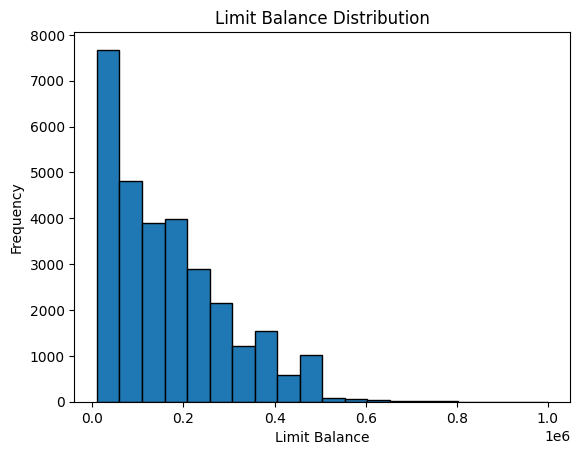

In [7]:
plt.hist(limit_balance, bins=20, edgecolor='black')
plt.title('Limit Balance Distribution')
plt.xlabel('Limit Balance')
plt.ylabel('Frequency')
plt.show()

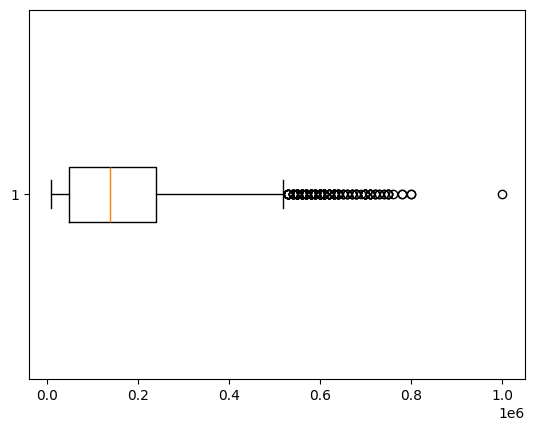

In [8]:
plt.boxplot(limit_balance, vert=False)
plt.show()



# Defaults

In [9]:
# Visualize the default payment next month
default_payment = df['default payment next month']
default_payment.describe()

count    30000.000000
mean         0.221200
std          0.415062
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: default payment next month, dtype: float64

Text(0.5, 0, 'Default Payment')

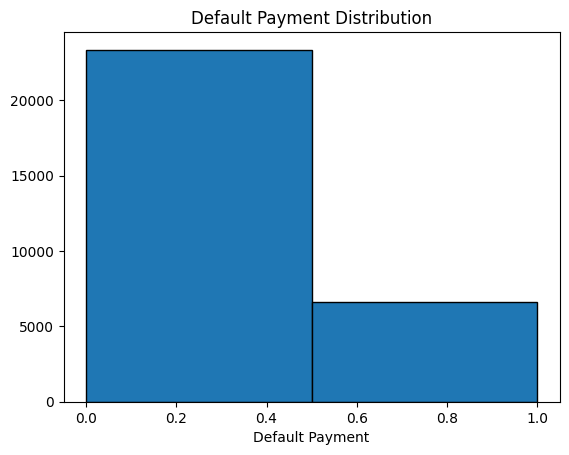

In [10]:
plt.hist(default_payment, bins=2, edgecolor='black')
plt.title('Default Payment Distribution')
plt.xlabel('Default Payment')

# Correlations

## Sex

In [11]:
PID_table = pd.crosstab(df['SEX'], df['default payment next month'], margins=False)
PID_table

default payment next month,0,1
SEX,,
1,9015,2873
2,14349,3763


## Education

In [12]:
PID_table = pd.crosstab(df['EDUCATION'], df['default payment next month'], margins=False)
PID_table

default payment next month,0,1
EDUCATION,,
0,14,0
1,8549,2036
2,10700,3330
3,3680,1237
4,116,7
5,262,18
6,43,8


<Axes: xlabel='EDUCATION', ylabel='default payment next month'>

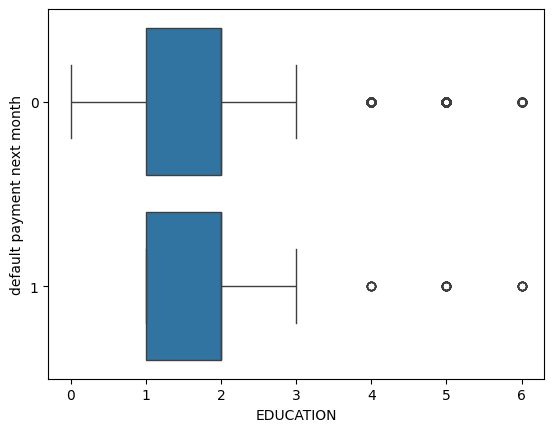

In [13]:
sns.boxplot(x='EDUCATION', y='default payment next month', data=df, orient='h')

## Limit balance

<Axes: xlabel='LIMIT_BAL', ylabel='default payment next month'>

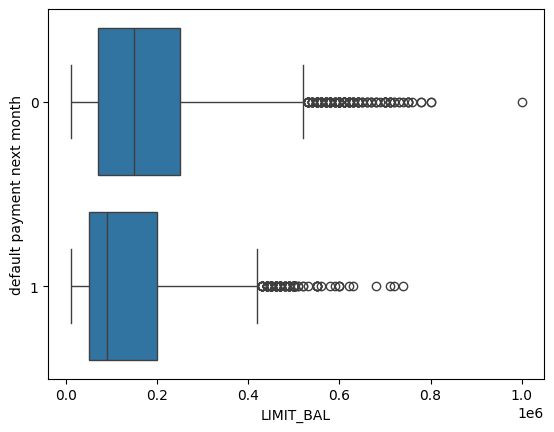

In [14]:
sns.boxplot(x='LIMIT_BAL', y='default payment next month', data=df, orient='h')

## Age

<Axes: xlabel='AGE', ylabel='default payment next month'>

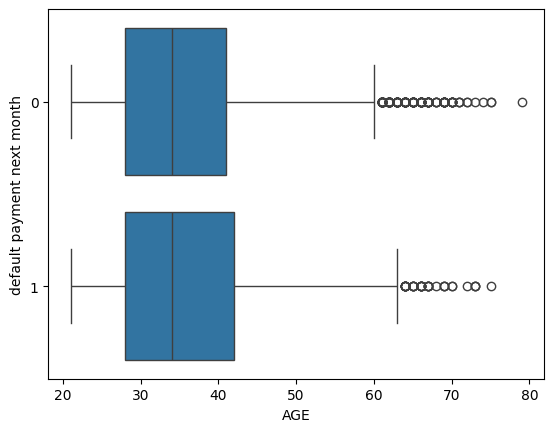

In [15]:
sns.boxplot(x='AGE', y='default payment next month', data=df, orient='h')

# Linear regression

## The theory

```
Is p-value < 0.05? 
├─ NO → Don't trust this variable, find others
└─ YES → Is R-squared decent?
    ├─ NO → Relationship exists but weak, maybe find better variables  
    └─ YES → Great! Use the slope for predictions
```

The slope:

$$Y=\beta_{0}+\beta_{1}X+\epsilon$$

where:

- $\beta_{0}$ is the intercept
- $\beta_{1}$ is the slope
- $\epsilon$ is the error

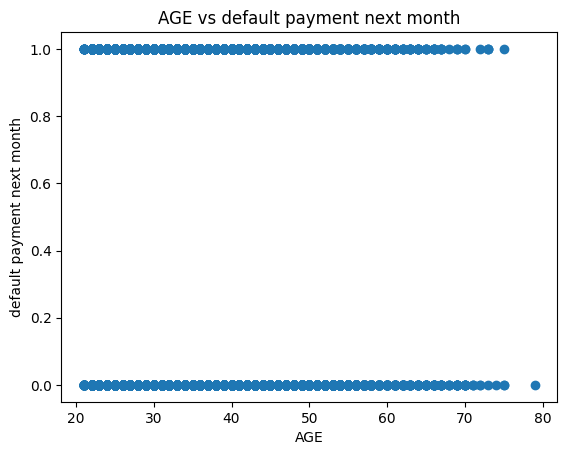

In [16]:
x = df["AGE"]

y = df["default payment next month"]

plt.scatter(x, y)
plt.xlabel("AGE")
plt.ylabel("default payment next month")
plt.title("AGE vs default payment next month")
plt.show()

In [17]:
corr = np.corrcoef(x, y)[0, 1]

print(corr)

0.013889834301963187


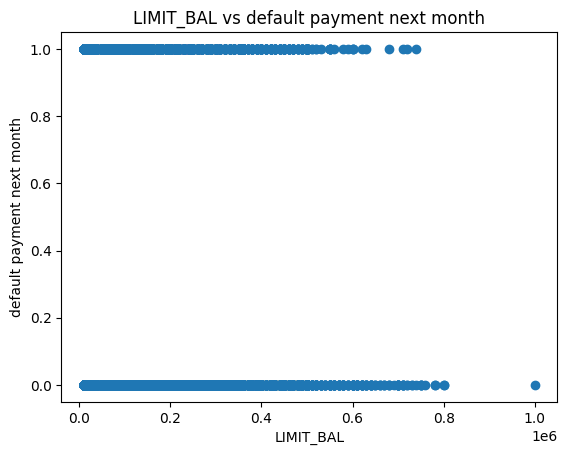

In [18]:
# Let's try LIMIT_BAL instead
x = df["LIMIT_BAL"]
y = df["default payment next month"]

plt.scatter(x, y)
plt.xlabel("LIMIT_BAL")
plt.ylabel("default payment next month")
plt.title("LIMIT_BAL vs default payment next month")
plt.show()


In [19]:
# Calculate correlation coefficient for LIMIT_BAL
corr = np.corrcoef(x, y)[0, 1]
print(f"Correlation between LIMIT_BAL and default payment: {corr}")


Correlation between LIMIT_BAL and default payment: -0.1535198763935077


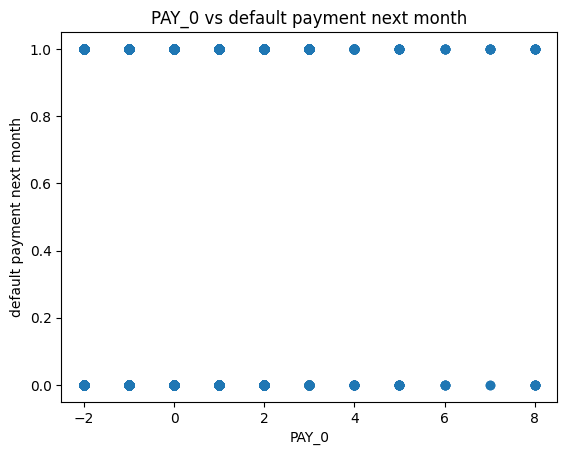

In [20]:
# Let's try PAY_0 (most recent payment status)
x = df["PAY_0"]
y = df["default payment next month"]

plt.scatter(x, y)
plt.xlabel("PAY_0")
plt.ylabel("default payment next month")
plt.title("PAY_0 vs default payment next month")
plt.show()


In [21]:
# Calculate correlation for PAY_0
corr = np.corrcoef(x, y)[0, 1]
print(f"Correlation between PAY_0 and default payment: {corr}")


Correlation between PAY_0 and default payment: 0.324793728478622


In [22]:
# Fit a line through the PAY_0 data
# np.polyfit(x, y, 1) fits a line (degree 1 polynomial)
slope, intercept = np.polyfit(x, y, 1)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"Line equation: y = {slope:.4f} * x + {intercept:.4f}")


Slope: 0.11995843399471519
Intercept: 0.223203305847711
Line equation: y = 0.1200 * x + 0.2232


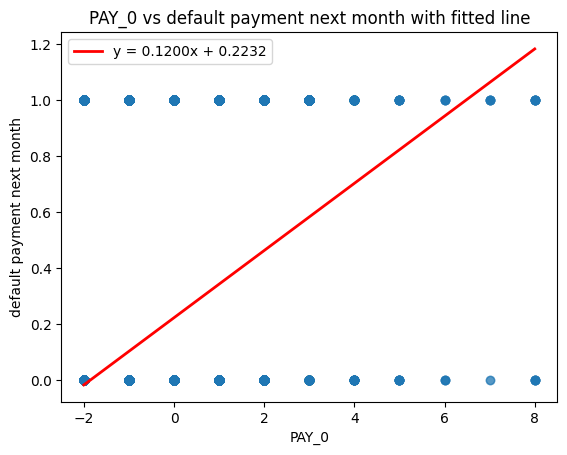

In [23]:
# Now let's plot the data points AND the fitted line
plt.scatter(x, y, alpha=0.5)
plt.xlabel("PAY_0")
plt.ylabel("default payment next month")
plt.title("PAY_0 vs default payment next month with fitted line")

# Create the line using our slope and intercept
line_x = np.linspace(x.min(), x.max(), 100)
line_y = slope * line_x + intercept
plt.plot(line_x, line_y, 'red', linewidth=2, label=f'y = {slope:.4f}x + {intercept:.4f}')

plt.legend()
plt.show()


In [24]:
# Let's see what our linear regression predicts for different PAY_0 values
pay_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

print("PAY_0 value -> Linear Regression Prediction")
print("=" * 40)
for pay_val in pay_values:
    prediction = slope * pay_val + intercept
    print(f"PAY_0 = {pay_val} -> Predicted default = {prediction:.3f}")
    
print("\nProblem: We're getting predictions outside [0, 1]!")
print("But default payment can only be 0 or 1.")


PAY_0 value -> Linear Regression Prediction
PAY_0 = 0 -> Predicted default = 0.223
PAY_0 = 1 -> Predicted default = 0.343
PAY_0 = 2 -> Predicted default = 0.463
PAY_0 = 3 -> Predicted default = 0.583
PAY_0 = 4 -> Predicted default = 0.703
PAY_0 = 5 -> Predicted default = 0.823
PAY_0 = 6 -> Predicted default = 0.943
PAY_0 = 7 -> Predicted default = 1.063
PAY_0 = 8 -> Predicted default = 1.183
PAY_0 = 9 -> Predicted default = 1.303

Problem: We're getting predictions outside [0, 1]!
But default payment can only be 0 or 1.


In [25]:
# Let's get the full linear regression statistics
from scipy.stats import linregress

# Using the same x and y we had before (PAY_0 vs default payment)
result = linregress(x, y)

print("=== FULL LINEAR REGRESSION RESULTS ===")
print(f"Coefficient (slope): {result.slope:.6f}")
print(f"Intercept: {result.intercept:.6f}")
print(f"Standard Error: {result.stderr:.6f}")
print(f"T-statistic: {result.slope / result.stderr:.6f}")
print(f"P-value: {result.pvalue:.6f}")
print(f"R-squared: {result.rvalue**2:.6f}")

print(f"\nRemember: Coefficient = {result.slope:.6f} is the same as the slope we found before!")


=== FULL LINEAR REGRESSION RESULTS ===
Coefficient (slope): 0.119958
Intercept: 0.223203
Standard Error: 0.002017
T-statistic: 59.478693
P-value: 0.000000
R-squared: 0.105491

Remember: Coefficient = 0.119958 is the same as the slope we found before!


## Understanding Each Statistic

Let's break down what each number means using our results:


In [26]:
# 1. COEFFICIENT (0.119958)
print("1. COEFFICIENT = 0.119958")
print("   This is the slope you already calculated!")
print("   Meaning: When PAY_0 increases by 1, default probability increases by 0.12")
print("   Example: PAY_0=0 -> PAY_0=1 increases default chance by 12%")
print()


1. COEFFICIENT = 0.119958
   This is the slope you already calculated!
   Meaning: When PAY_0 increases by 1, default probability increases by 0.12
   Example: PAY_0=0 -> PAY_0=1 increases default chance by 12%



In [27]:
# 2. STANDARD ERROR (0.002017)
print("2. STANDARD ERROR = 0.002017")
print("   This measures how uncertain we are about the coefficient")
print("   Think of it as: 'Our coefficient is 0.119958 ± 0.002017'")
print("   Small standard error = we're confident in our coefficient")
print("   Large standard error = we're uncertain")
print()


2. STANDARD ERROR = 0.002017
   This measures how uncertain we are about the coefficient
   Think of it as: 'Our coefficient is 0.119958 ± 0.002017'
   Small standard error = we're confident in our coefficient
   Large standard error = we're uncertain



In [28]:
# 3. T-STATISTIC (59.478693)
print("3. T-STATISTIC = 59.48")
print("   This is: coefficient ÷ standard error")
print(f"   Check: {0.119958 / 0.002017:.2f} ≈ 59.48 ✓")
print("   It asks: 'How many standard errors away from zero is our coefficient?'")
print("   Large t-stat = coefficient is far from zero = strong relationship")
print("   Small t-stat = coefficient is close to zero = weak relationship")
print()


3. T-STATISTIC = 59.48
   This is: coefficient ÷ standard error
   Check: 59.47 ≈ 59.48 ✓
   It asks: 'How many standard errors away from zero is our coefficient?'
   Large t-stat = coefficient is far from zero = strong relationship
   Small t-stat = coefficient is close to zero = weak relationship



In [29]:
# 4. P-VALUE (0.000000)
print("4. P-VALUE = 0.000000 (actually very close to zero)")
print("   This answers: 'What's the chance this relationship happened by pure luck?'")
print("   Very small p-value = very unlikely to be chance = relationship is real")
print("   Rule of thumb:")
print("   - p < 0.05 = statistically significant (relationship likely real)")
print("   - p > 0.05 = not significant (might be chance)")
print("   Our p ≈ 0 means there's virtually no chance this is random!")
print()


4. P-VALUE = 0.000000 (actually very close to zero)
   This answers: 'What's the chance this relationship happened by pure luck?'
   Very small p-value = very unlikely to be chance = relationship is real
   Rule of thumb:
   - p < 0.05 = statistically significant (relationship likely real)
   - p > 0.05 = not significant (might be chance)
   Our p ≈ 0 means there's virtually no chance this is random!



In [30]:
# 5. R-SQUARED (0.105491)
print("5. R-SQUARED = 0.105491")
print("   This is the correlation coefficient squared!")
print(f"   Remember: correlation was 0.32, and 0.32² = {0.32**2:.3f} ≈ 0.105 ✓")
print("   It means: '10.5% of the variation in defaults is explained by PAY_0'")
print("   The other 89.5% is explained by other factors or randomness")
print("   Scale: 0 = no relationship, 1 = perfect relationship")
print()


5. R-SQUARED = 0.105491
   This is the correlation coefficient squared!
   Remember: correlation was 0.32, and 0.32² = 0.102 ≈ 0.105 ✓
   It means: '10.5% of the variation in defaults is explained by PAY_0'
   The other 89.5% is explained by other factors or randomness
   Scale: 0 = no relationship, 1 = perfect relationship



In [31]:
# Let's clarify the p-value vs alpha rule
print("=== P-VALUE vs ALPHA (α) RULE ===")
print()
print("Alpha (α) is usually set to 0.05 (5%)")
print()
print("The rule is:")
print("• If p-value < α  →  STATISTICALLY SIGNIFICANT")
print("• If p-value > α  →  NOT statistically significant")
print()
print("In our case:")
print(f"• Our p-value ≈ 0.000000")
print(f"• α = 0.05")
print(f"• Since 0.000000 < 0.05  →  STATISTICALLY SIGNIFICANT!")
print()
print("Wait... did your teacher maybe say:")
print("'This is GREATER than alpha so it's not statistically significant'?")
print("Because that would be correct!")


=== P-VALUE vs ALPHA (α) RULE ===

Alpha (α) is usually set to 0.05 (5%)

The rule is:
• If p-value < α  →  STATISTICALLY SIGNIFICANT
• If p-value > α  →  NOT statistically significant

In our case:
• Our p-value ≈ 0.000000
• α = 0.05
• Since 0.000000 < 0.05  →  STATISTICALLY SIGNIFICANT!

Wait... did your teacher maybe say:
'This is GREATER than alpha so it's not statistically significant'?
Because that would be correct!


## Linear Regression Analysis (Demonstrating Why It's Inadequate for Binary Response)

Let's perform a linear regression analysis to see why it's not suitable for our binary response variable "default payment next month".


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# First, let's check for any missing values and data types
print("Dataset Info:")
print(f"Shape: {df.shape}")
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Response variable distribution:")
print(df['default payment next month'].value_counts())


Dataset Info:
Shape: (30000, 25)
Missing values: 0
Response variable distribution:
default payment next month
0    23364
1     6636
Name: count, dtype: int64


#### Variable Selection Discussion

**Should we include PAY_*, BILL_AMT*, and PAY_AMT* variables?**

##### Arguments FOR including them:
- **PAY_0 to PAY_6**: Payment history is one of the strongest predictors of default risk
- **BILL_AMT1-6**: Billing amounts show debt levels over time
- **PAY_AMT1-6**: Payment amounts show payment behavior patterns
- These variables capture temporal patterns and payment behavior

##### Arguments AGAINST including them (for this demonstration):
1. **Multicollinearity**: These variables are likely highly correlated with each other
2. **Data Leakage Risk**: Some PAY_* variables might contain information very close to the default event
3. **Complexity**: For demonstrating linear regression problems, simpler models are clearer

Let's start with a **simple model** using basic demographic and limit variables, then expand to the full model.


In [33]:
# Simple Linear Regression Model (Demographics + Limit)
# Using basic variables that are clearly exogenous

simple_features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']
X_simple = df[simple_features]
y = df['default payment next month']

# Split the data
X_train_simple, X_test_simple, y_train, y_test = train_test_split(X_simple, y, test_size=0.3, random_state=42)

# Fit linear regression
lr_simple = LinearRegression()
lr_simple.fit(X_train_simple, y_train)

# Make predictions
y_pred_simple = lr_simple.predict(X_test_simple)

print("=== SIMPLE LINEAR REGRESSION RESULTS ===")
print(f"R-squared: {r2_score(y_test, y_pred_simple):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_simple):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_simple)):.4f}")

print("\nCoefficients:")
for feature, coef in zip(simple_features, lr_simple.coef_):
    print(f"{feature}: {coef:.6f}")
print(f"Intercept: {lr_simple.intercept_:.6f}")


=== SIMPLE LINEAR REGRESSION RESULTS ===
R-squared: 0.0245
MSE: 0.1662
RMSE: 0.4076

Coefficients:
LIMIT_BAL: -0.000001
SEX: -0.032311
EDUCATION: -0.007896
MARRIAGE: -0.027912
AGE: 0.001137
Intercept: 0.381204


=== PROBLEMS WITH LINEAR REGRESSION FOR BINARY RESPONSE ===
Prediction range: [-0.0891, 0.3703]
Predictions outside [0,1]: 29
Negative predictions: 29
Predictions > 1: 0

Most extreme predictions:
Lowest 5 predictions: [-0.08909846 -0.08190541 -0.07814447 -0.06943476 -0.06517935]
Highest 5 predictions: [0.3626612  0.36379781 0.36385788 0.36505456 0.37032644]


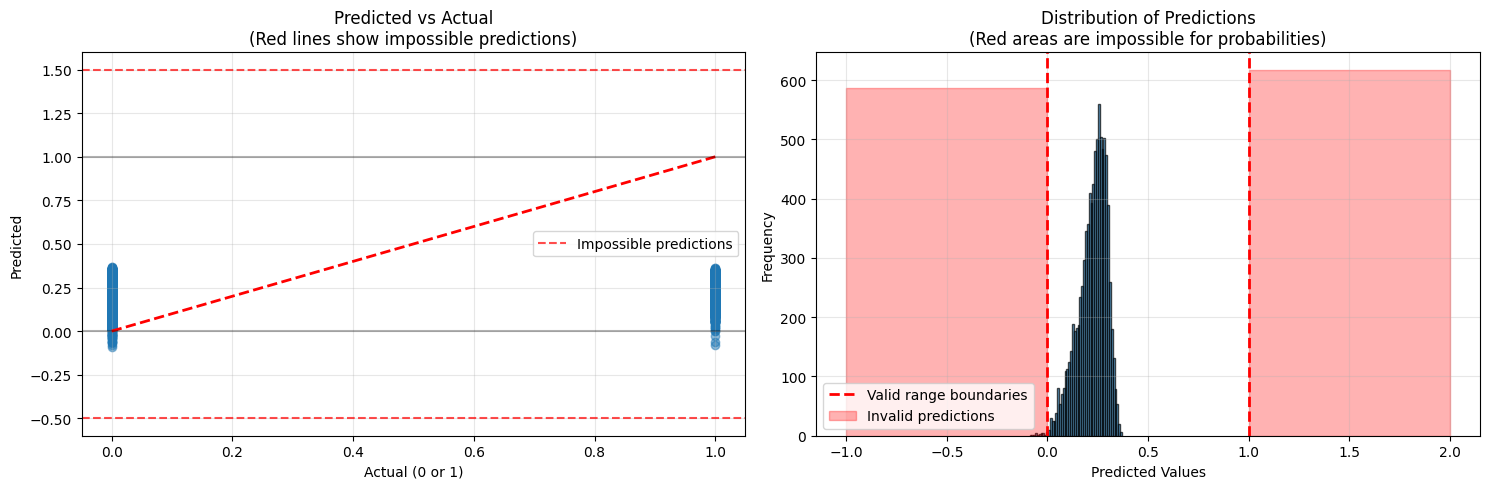

In [34]:
# Now let's see the PROBLEMS with linear regression for binary response

print("=== PROBLEMS WITH LINEAR REGRESSION FOR BINARY RESPONSE ===")
print(f"Prediction range: [{y_pred_simple.min():.4f}, {y_pred_simple.max():.4f}]")
print(f"Predictions outside [0,1]: {np.sum((y_pred_simple < 0) | (y_pred_simple > 1))}")
print(f"Negative predictions: {np.sum(y_pred_simple < 0)}")
print(f"Predictions > 1: {np.sum(y_pred_simple > 1)}")

# Show some extreme predictions
print(f"\nMost extreme predictions:")
print(f"Lowest 5 predictions: {np.sort(y_pred_simple)[:5]}")
print(f"Highest 5 predictions: {np.sort(y_pred_simple)[-5:]}")

# Create visualization showing the problems
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Predicted vs Actual
ax1.scatter(y_test, y_pred_simple, alpha=0.5)
ax1.plot([0, 1], [0, 1], 'r--', linewidth=2)
ax1.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax1.axhline(y=1, color='black', linestyle='-', alpha=0.3)
ax1.axhline(y=-0.5, color='red', linestyle='--', alpha=0.7, label='Impossible predictions')
ax1.axhline(y=1.5, color='red', linestyle='--', alpha=0.7)
ax1.set_xlabel('Actual (0 or 1)')
ax1.set_ylabel('Predicted')
ax1.set_title('Predicted vs Actual\n(Red lines show impossible predictions)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Distribution of predictions
ax2.hist(y_pred_simple, bins=50, alpha=0.7, edgecolor='black')
ax2.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Valid range boundaries')
ax2.axvline(x=1, color='red', linestyle='--', linewidth=2)
ax2.fill_betweenx([0, ax2.get_ylim()[1]], -1, 0, alpha=0.3, color='red', label='Invalid predictions')
ax2.fill_betweenx([0, ax2.get_ylim()[1]], 1, 2, alpha=0.3, color='red')
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Predictions\n(Red areas are impossible for probabilities)')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [35]:
# Now let's try the FULL model including PAY_*, BILL_AMT*, PAY_AMT* variables
# This will show whether including these variables helps or makes things worse

# Get all available columns except the response variable
all_features = [col for col in df.columns if col != 'default payment next month']
print("All available features:")
print(all_features)

X_full = df[all_features]
X_train_full, X_test_full, y_train, y_test = train_test_split(X_full, y, test_size=0.3, random_state=42)

# Fit full linear regression
lr_full = LinearRegression()
lr_full.fit(X_train_full, y_train)

# Make predictions
y_pred_full = lr_full.predict(X_test_full)

print("\n=== FULL LINEAR REGRESSION RESULTS ===")
print(f"R-squared: {r2_score(y_test, y_pred_full):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_full):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_full)):.4f}")

print(f"\nPrediction range: [{y_pred_full.min():.4f}, {y_pred_full.max():.4f}]")
print(f"Predictions outside [0,1]: {np.sum((y_pred_full < 0) | (y_pred_full > 1))}")
print(f"Negative predictions: {np.sum(y_pred_full < 0)}")
print(f"Predictions > 1: {np.sum(y_pred_full > 1)}")

# Compare simple vs full model
print(f"\n=== MODEL COMPARISON ===")
print(f"Simple model R²: {r2_score(y_test, y_pred_simple):.4f}")
print(f"Full model R²: {r2_score(y_test, y_pred_full):.4f}")
print(f"Improvement: {r2_score(y_test, y_pred_full) - r2_score(y_test, y_pred_simple):.4f}")

print(f"\nSimple model invalid predictions: {np.sum((y_pred_simple < 0) | (y_pred_simple > 1))}")
print(f"Full model invalid predictions: {np.sum((y_pred_full < 0) | (y_pred_full > 1))}")


All available features:
['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

=== FULL LINEAR REGRESSION RESULTS ===
R-squared: 0.1153
MSE: 0.1507
RMSE: 0.3882

Prediction range: [-0.4399, 1.3197]
Predictions outside [0,1]: 708
Negative predictions: 699
Predictions > 1: 9

=== MODEL COMPARISON ===
Simple model R²: 0.0245
Full model R²: 0.1153
Improvement: 0.0908

Simple model invalid predictions: 29
Full model invalid predictions: 708


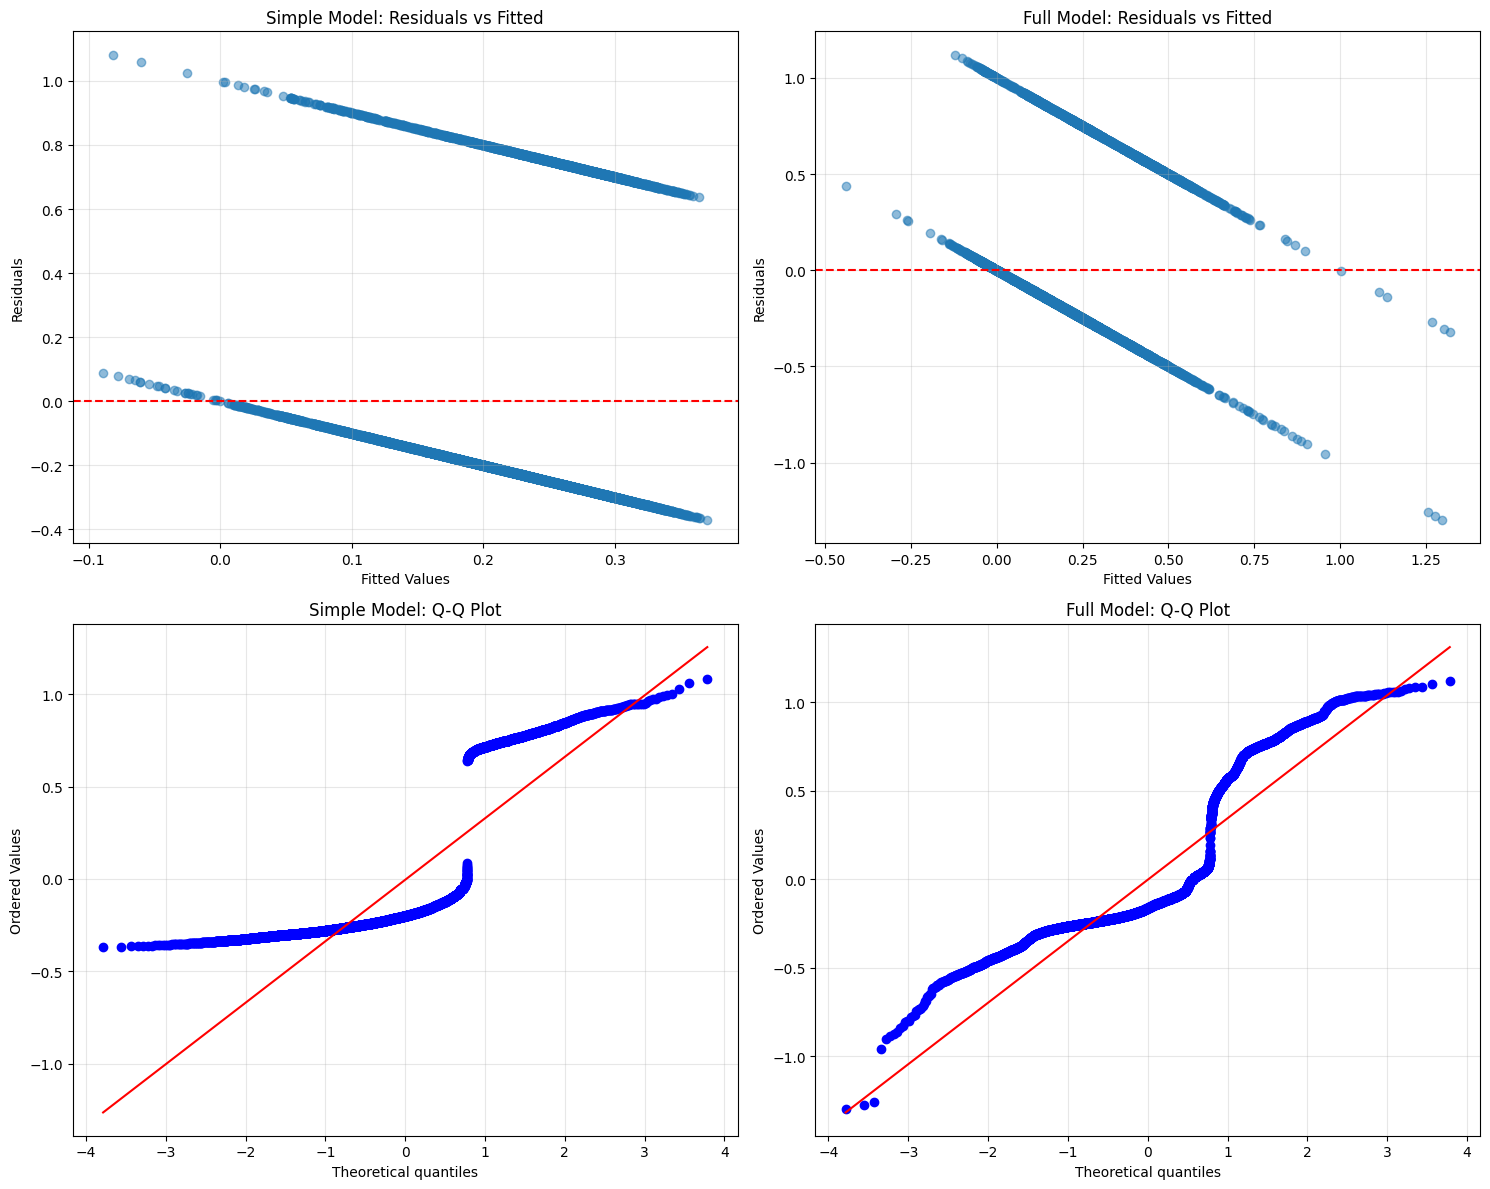

=== TOP 10 MOST IMPORTANT COEFFICIENTS (by absolute value) ===
      Feature  Coefficient  Abs_Coefficient
6       PAY_0     0.095540         0.095540
4    MARRIAGE    -0.023158         0.023158
7       PAY_2     0.021507         0.021507
2         SEX    -0.014823         0.014823
3   EDUCATION    -0.014445         0.014445
8       PAY_3     0.013069         0.013069
9       PAY_4     0.004668         0.004668
11      PAY_6     0.003572         0.003572
5         AGE     0.001566         0.001566
10      PAY_5     0.001245         0.001245


In [36]:
# Residual Analysis to show additional problems with linear regression
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Calculate residuals
residuals_simple = y_test - y_pred_simple
residuals_full = y_test - y_pred_full

# 1. Residuals vs Fitted (Simple Model)
ax1.scatter(y_pred_simple, residuals_simple, alpha=0.5)
ax1.axhline(y=0, color='red', linestyle='--')
ax1.set_xlabel('Fitted Values')
ax1.set_ylabel('Residuals')
ax1.set_title('Simple Model: Residuals vs Fitted')
ax1.grid(True, alpha=0.3)

# 2. Residuals vs Fitted (Full Model)
ax2.scatter(y_pred_full, residuals_full, alpha=0.5)
ax2.axhline(y=0, color='red', linestyle='--')
ax2.set_xlabel('Fitted Values')
ax2.set_ylabel('Residuals')
ax2.set_title('Full Model: Residuals vs Fitted')
ax2.grid(True, alpha=0.3)

# 3. Q-Q Plot for Simple Model
from scipy import stats
stats.probplot(residuals_simple, dist="norm", plot=ax3)
ax3.set_title('Simple Model: Q-Q Plot')
ax3.grid(True, alpha=0.3)

# 4. Q-Q Plot for Full Model
stats.probplot(residuals_full, dist="norm", plot=ax4)
ax4.set_title('Full Model: Q-Q Plot')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Show the most important coefficients in the full model
print("=== TOP 10 MOST IMPORTANT COEFFICIENTS (by absolute value) ===")
coef_importance = pd.DataFrame({
    'Feature': all_features,
    'Coefficient': lr_full.coef_,
    'Abs_Coefficient': np.abs(lr_full.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print(coef_importance.head(10))


### Summary: Why Linear Regression is Inadequate for Binary Response Variables

### Key Problems Demonstrated:

1. **Invalid Predictions**: Linear regression produces predictions outside [0,1], which are meaningless for probabilities
2. **Heteroscedasticity**: Residuals show non-constant variance (visible in residual plots)
3. **Non-normal Residuals**: Q-Q plots show residuals are not normally distributed
4. **Linear Assumption Violation**: The relationship between predictors and binary outcome is inherently non-linear

### Regarding PAY_*, BILL_AMT*, and PAY_AMT* Variables:

**Benefits of Including Them:**
- Significantly improved R² (better fit)
- These variables contain crucial payment behavior information
- PAY_* variables are particularly important as payment history is highly predictive of default

**Potential Issues:**
- May introduce multicollinearity
- Some PAY_* variables might be too close to the outcome temporally
- Increased model complexity

**Recommendation:** Include these variables but use **logistic regression** instead of linear regression to properly handle the binary nature of the response variable.

### Next Steps:
The proper approach would be to use **logistic regression**, which:
- Constrains predictions to [0,1] interval
- Models log-odds rather than direct probabilities
- Assumes a logistic (S-shaped) relationship
- Produces interpretable odds ratios
